In [2]:
%matplotlib notebook

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import rankdata
from IPython.display import display, display_markdown

def display_md(md, **kwargs):
    return display_markdown(md, raw=True, **kwargs)

sns.set(style='whitegrid', palette='Set2')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
# unigram
df_uni = pd.read_csv('dedup.en.words.unigrams.tsv', sep='\t')
df_uni['log_unigram_freq'] = np.log10(df_uni['unigram_freq'])
df_uni = df_uni.drop(columns='unigram_freq')
display(df_uni.head())

,unigram,log_unigram_freq
0,the,7.427938
1,you,7.411157
2,i,7.398484
3,to,7.286496
4,a,7.204781


In [56]:
# bigram
df_bi = pd.read_csv('dedup.en.words.bigrams.tsv', sep='\t')
df_bi = df_bi[df_bi['bigram_freq'] > 1]
df_bi['log_bigram_freq'] = np.log10(df_bi['bigram_freq'])
df_bi = df_bi.drop(columns='bigram_freq')
display(df_bi.head())

,bigram,log_bigram_freq
0,i m,6.555285
1,it s,6.532841
2,don t,6.504673
3,you re,6.344556
4,in the,6.335658


In [59]:
# word1/word2
df_bi['word1'] = df_bi['bigram'].apply(lambda x: x.split(' ')[0])
df_bi['word2'] = df_bi['bigram'].apply(lambda x: x.split(' ')[1])
df_bi = df_bi.merge(df_uni.rename(columns={'unigram': 'word1', 'log_unigram_freq': 'log_word1_freq'}), how='left', on='word1')
df_bi = df_bi.merge(df_uni.rename(columns={'unigram': 'word2', 'log_unigram_freq': 'log_word2_freq'}), how='left', on='word2')
display(df_bi.head())

,bigram,log_bigram_freq,word1,word2,log_word1_freq,log_word2_freq
0,i m,6.555285,i,m,7.398484,6.567823
1,it s,6.532841,it,s,7.075765,7.103804
2,don t,6.504673,don,t,6.510799,6.936017
3,you re,6.344556,you,re,7.411157,6.585544
4,in the,6.335658,in,the,6.933632,7.427938


In [92]:
# ftp/btp
df_bi['log_ftp'] = df_bi['log_bigram_freq'] - df_bi['log_word1_freq']
df_bi['log_btp'] = df_bi['log_bigram_freq'] - df_bi['log_word2_freq']
display(df_bi.head())

,bigram,log_bigram_freq,word1,word2,log_word1_freq,log_word2_freq,log_ftp,log_btp
0,i m,6.555285,i,m,7.398484,6.567823,-0.843199,-0.012538
1,it s,6.532841,it,s,7.075765,7.103804,-0.542925,-0.570963
2,don t,6.504673,don,t,6.510799,6.936017,-0.006126,-0.431344
3,you re,6.344556,you,re,7.411157,6.585544,-1.066602,-0.240988
4,in the,6.335658,in,the,6.933632,7.427938,-0.597975,-1.092281


In [104]:
# store df
df_bi.to_csv('full_bigram_data.tsv', sep='\t', index=False)

In [ ]:
# load df
df_bi = pd.read_csv('full_bigram_data.tsv', sep='\t')

<IPython.core.display.Javascript object>


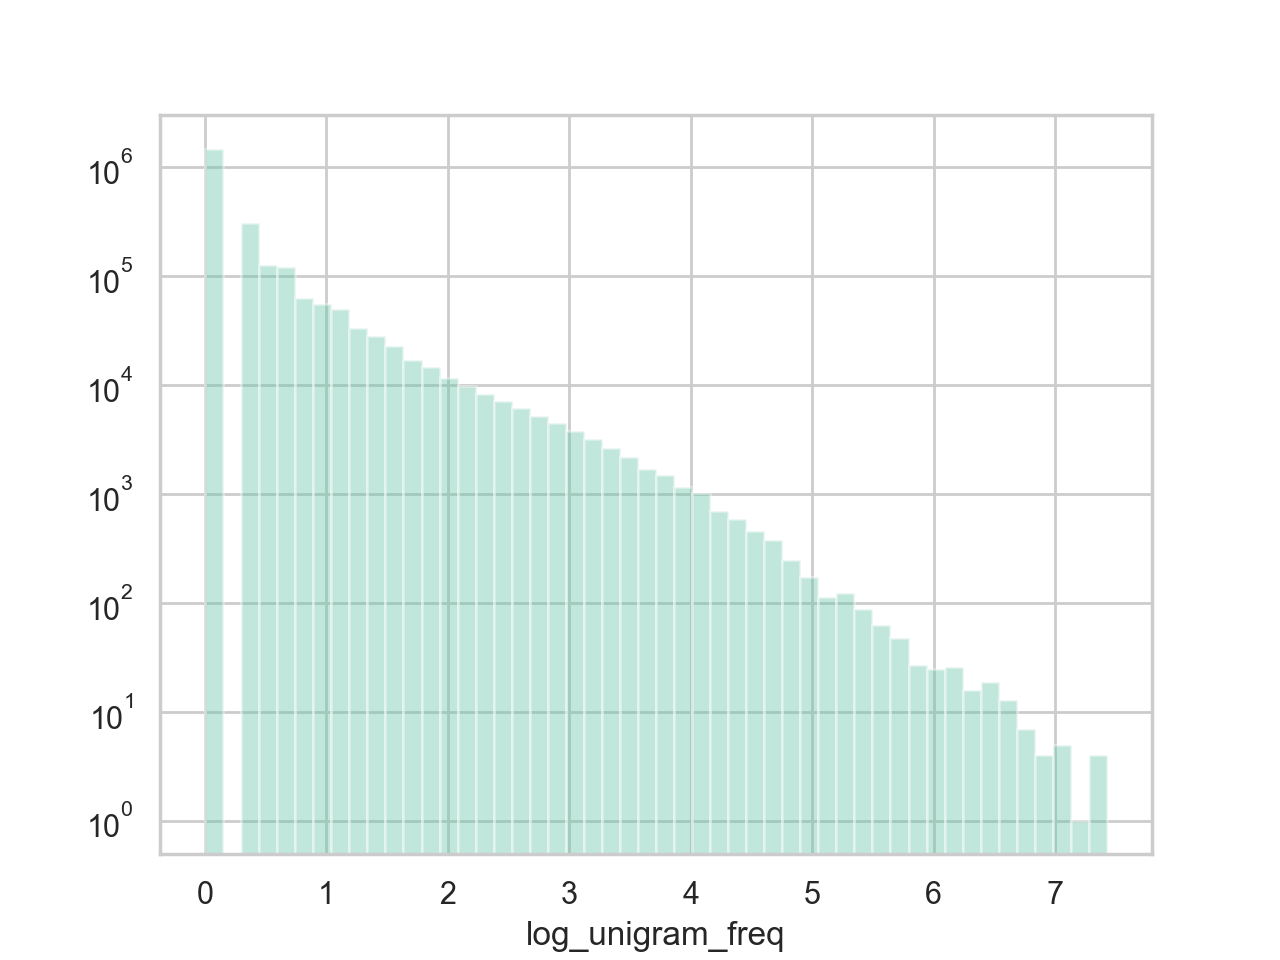

In [50]:
g = sns.distplot(df_uni['log_unigram_freq'], kde=False)
g.set(yscale='log');

<IPython.core.display.Javascript object>


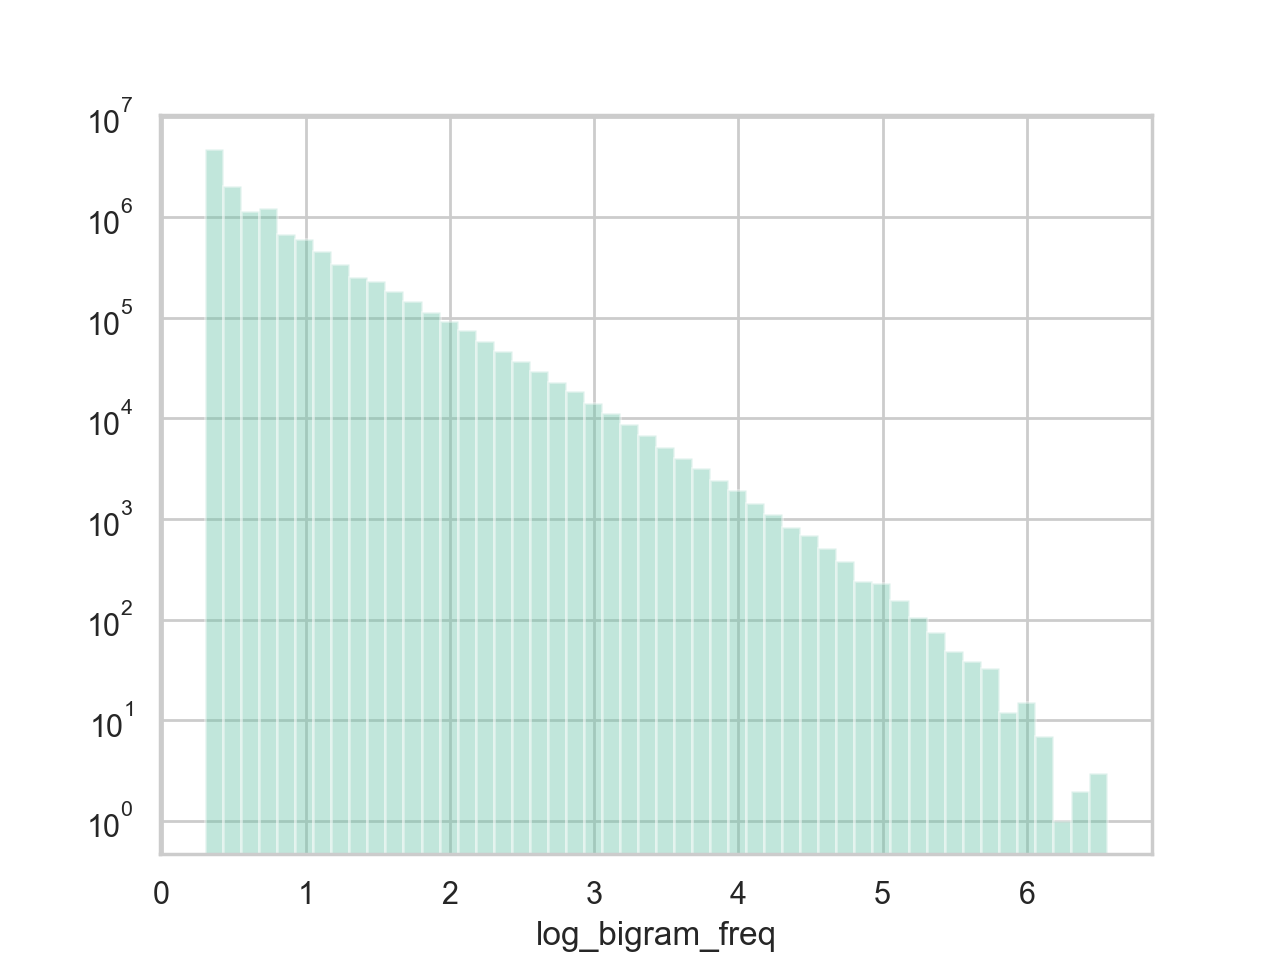

In [63]:
g = sns.distplot(df_bi['log_bigram_freq'], kde=False)
g.set(yscale='log');

<IPython.core.display.Javascript object>


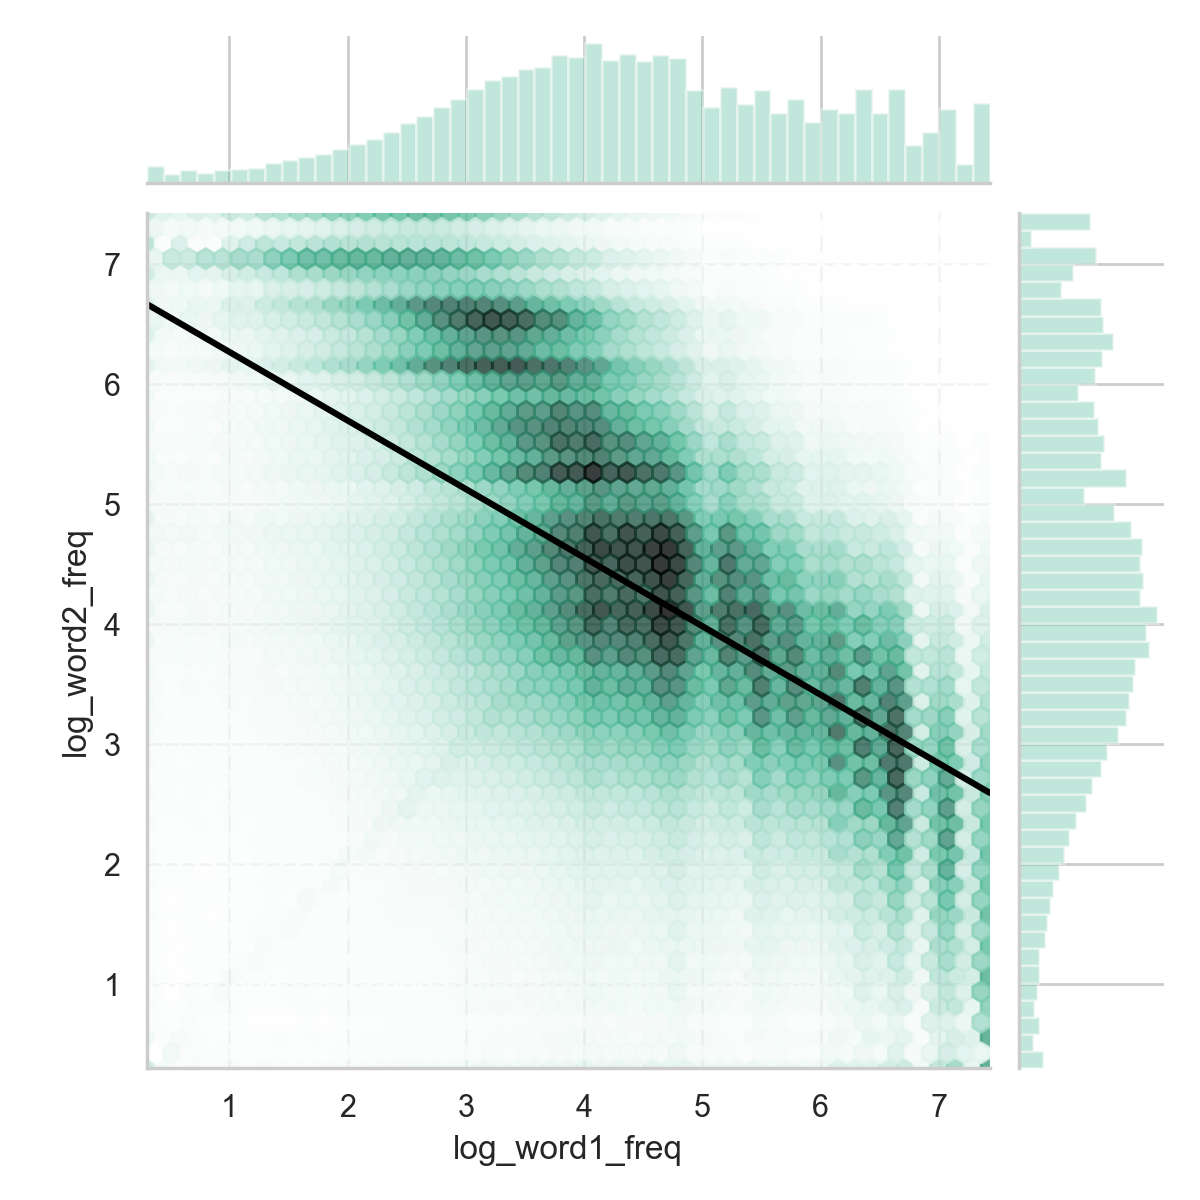

In [84]:
x = df_bi['log_word1_freq']
y = df_bi['log_word2_freq']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


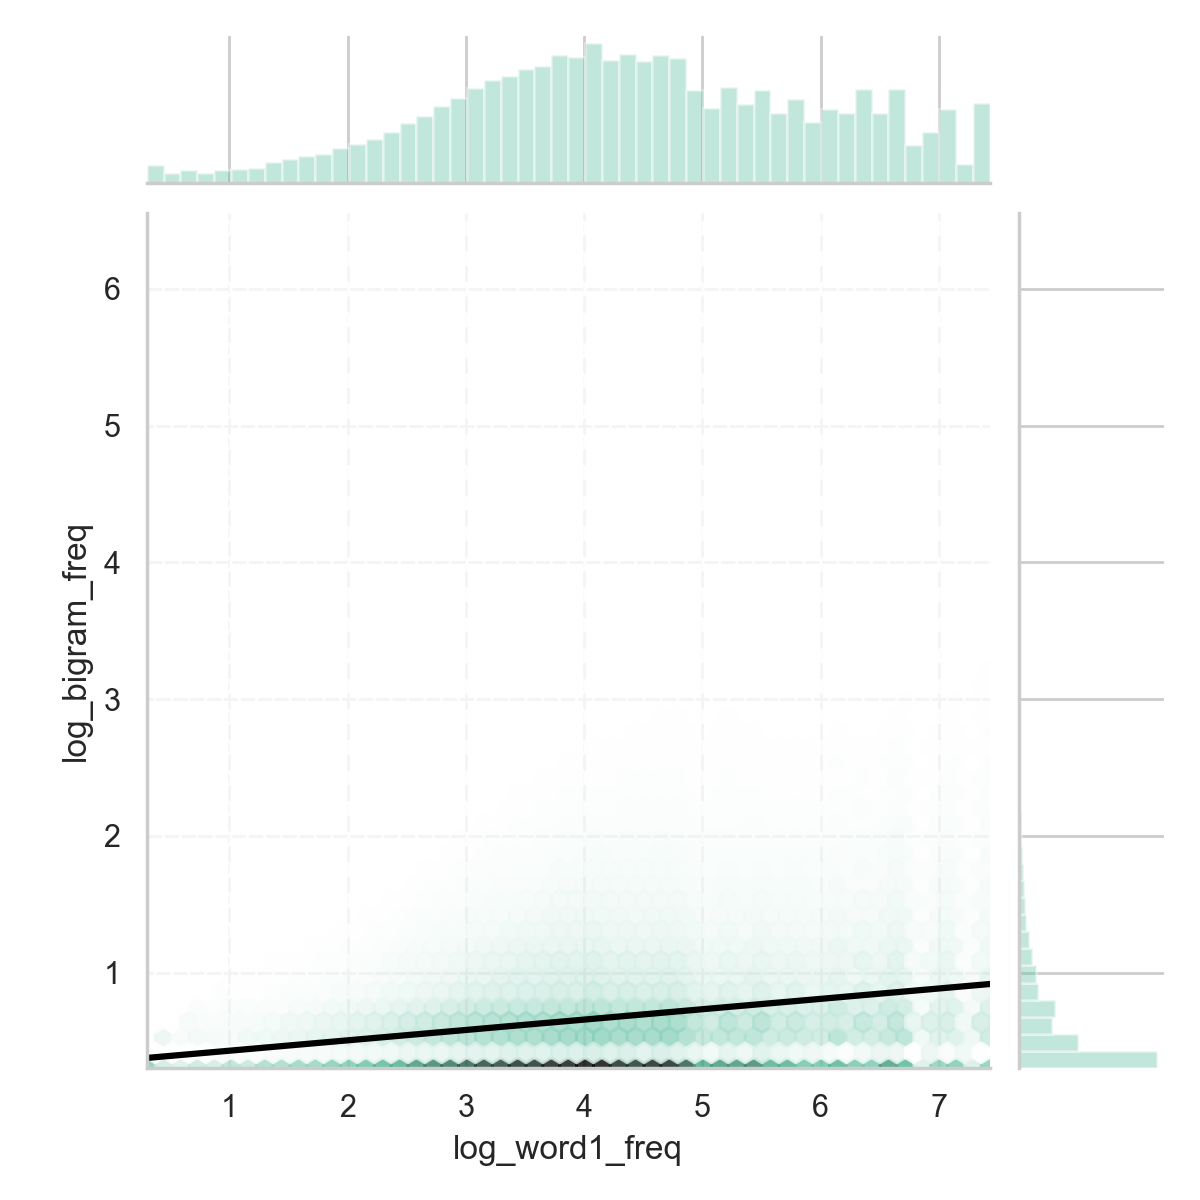

In [90]:
x = df_bi['log_word1_freq']
y = df_bi['log_bigram_freq']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


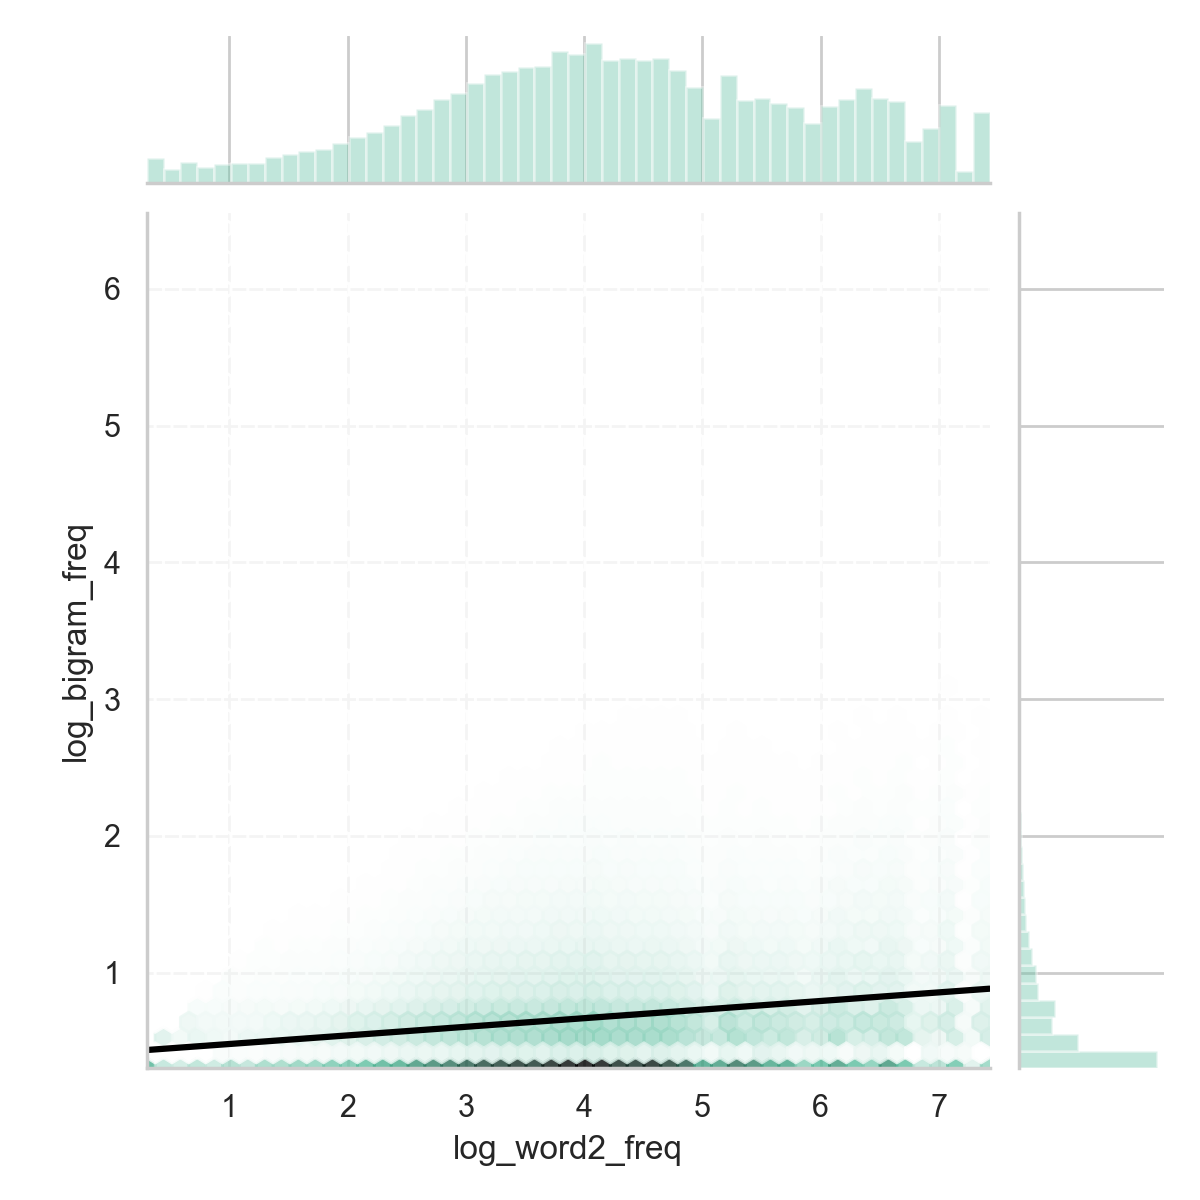

In [86]:
x = df_bi['log_word2_freq']
y = df_bi['log_bigram_freq']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


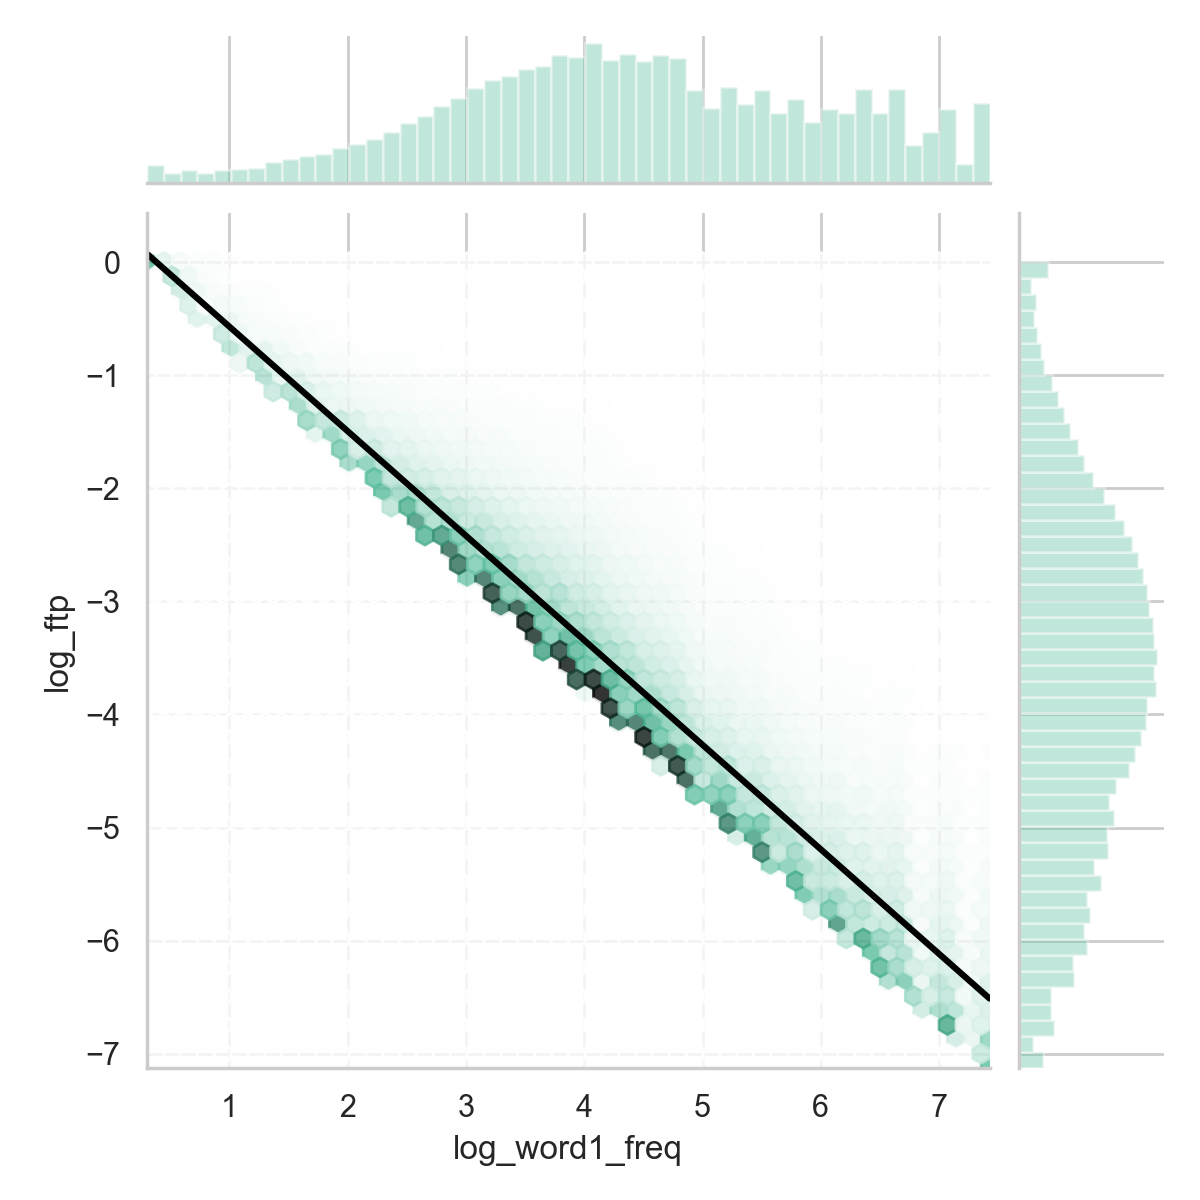

In [93]:
x = df_bi['log_word1_freq']
y = df_bi['log_ftp']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


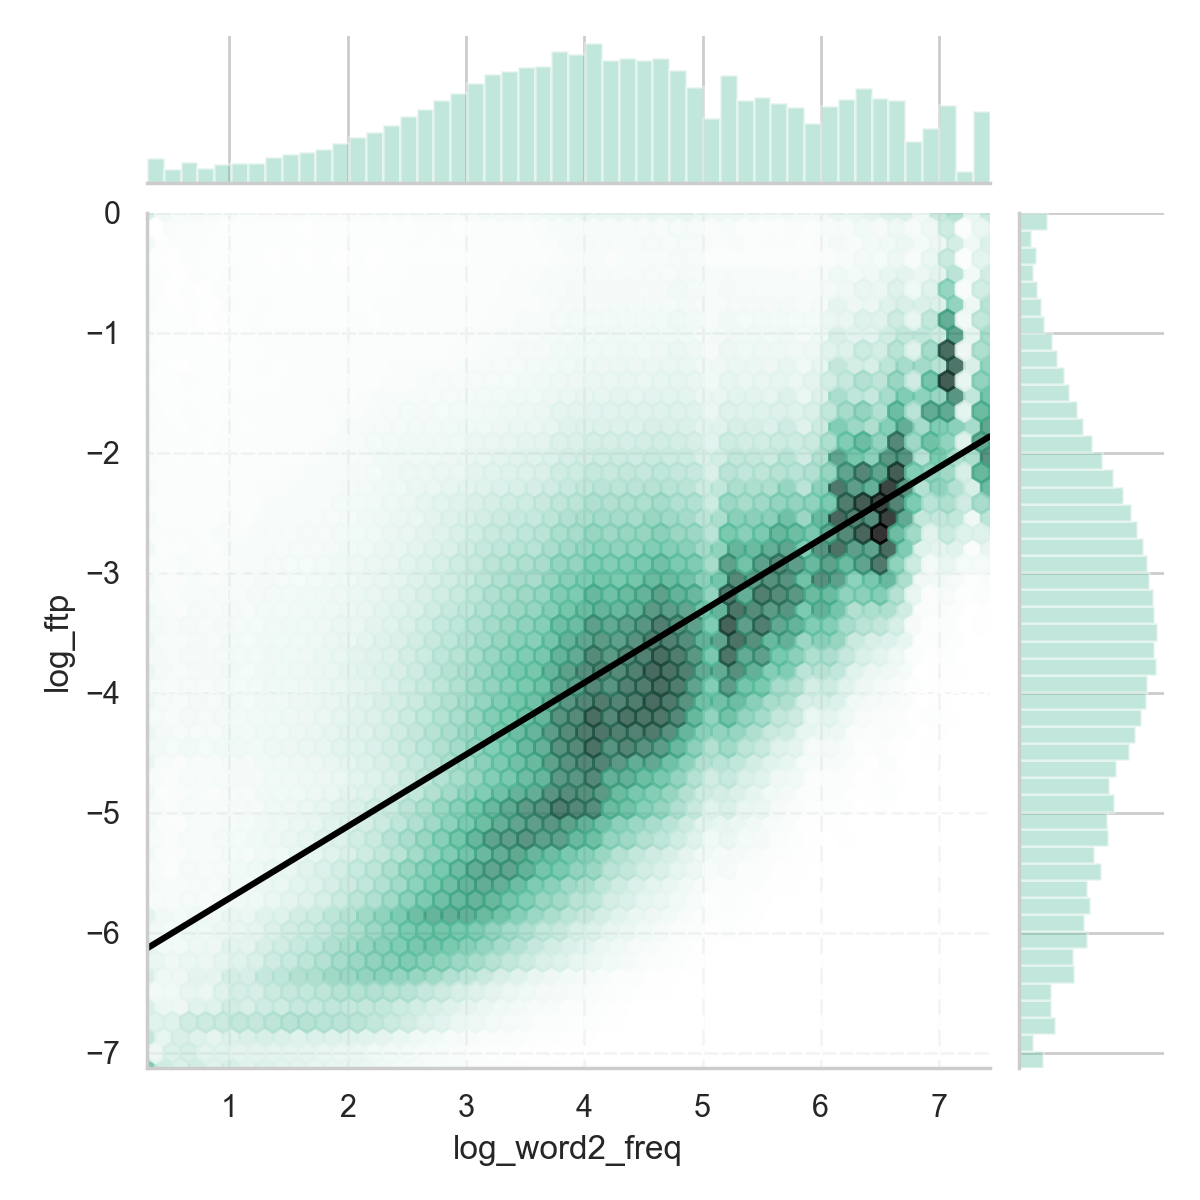

In [94]:
x = df_bi['log_word2_freq']
y = df_bi['log_ftp']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


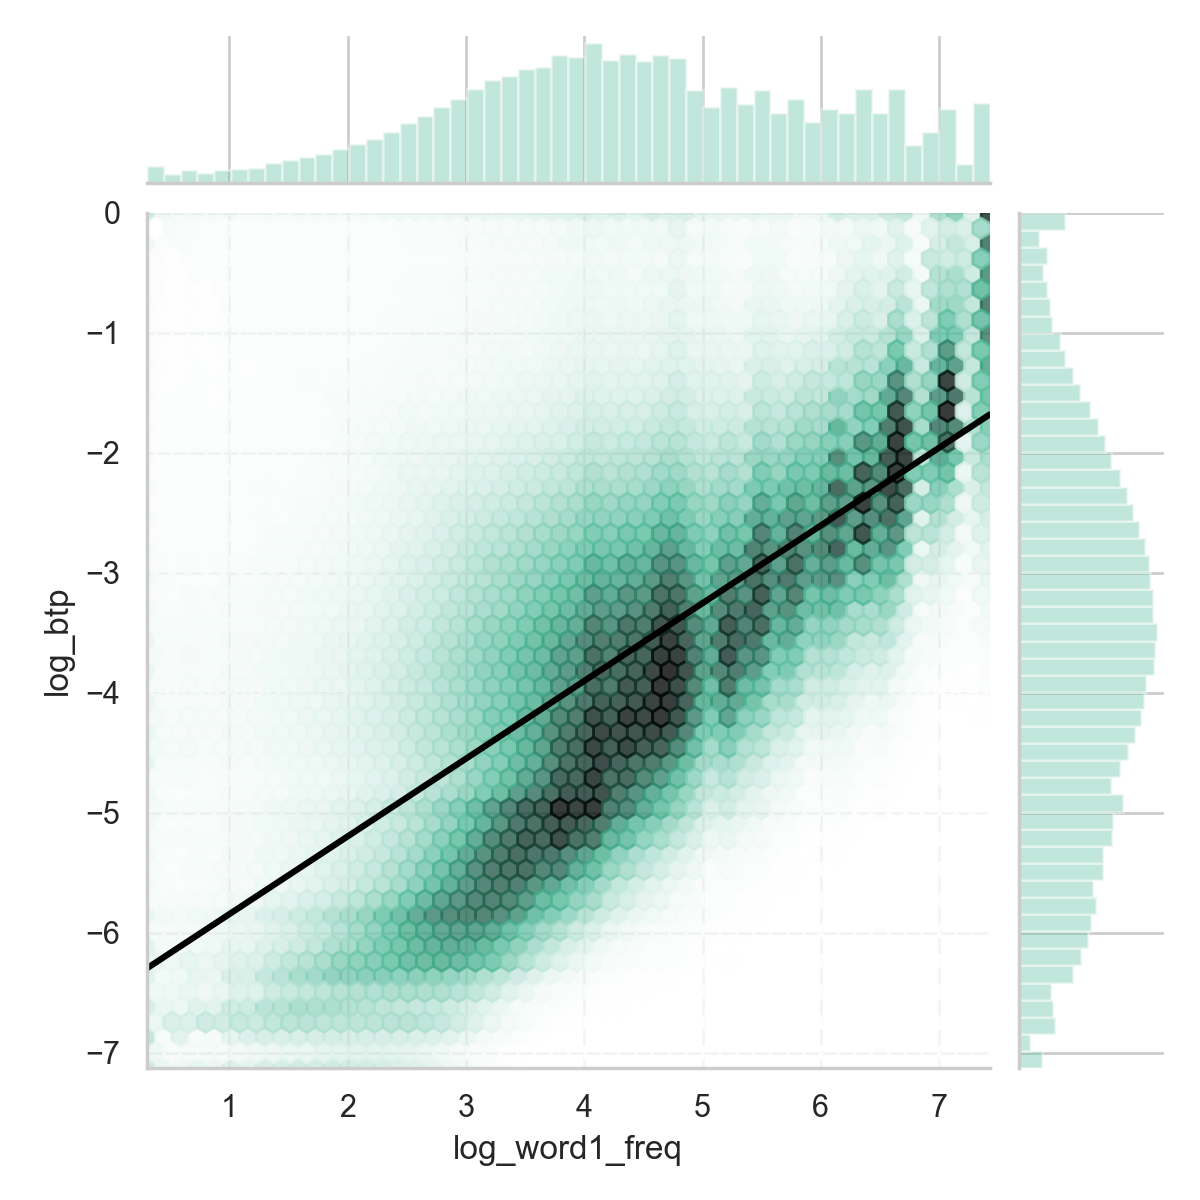

In [95]:
x = df_bi['log_word1_freq']
y = df_bi['log_btp']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


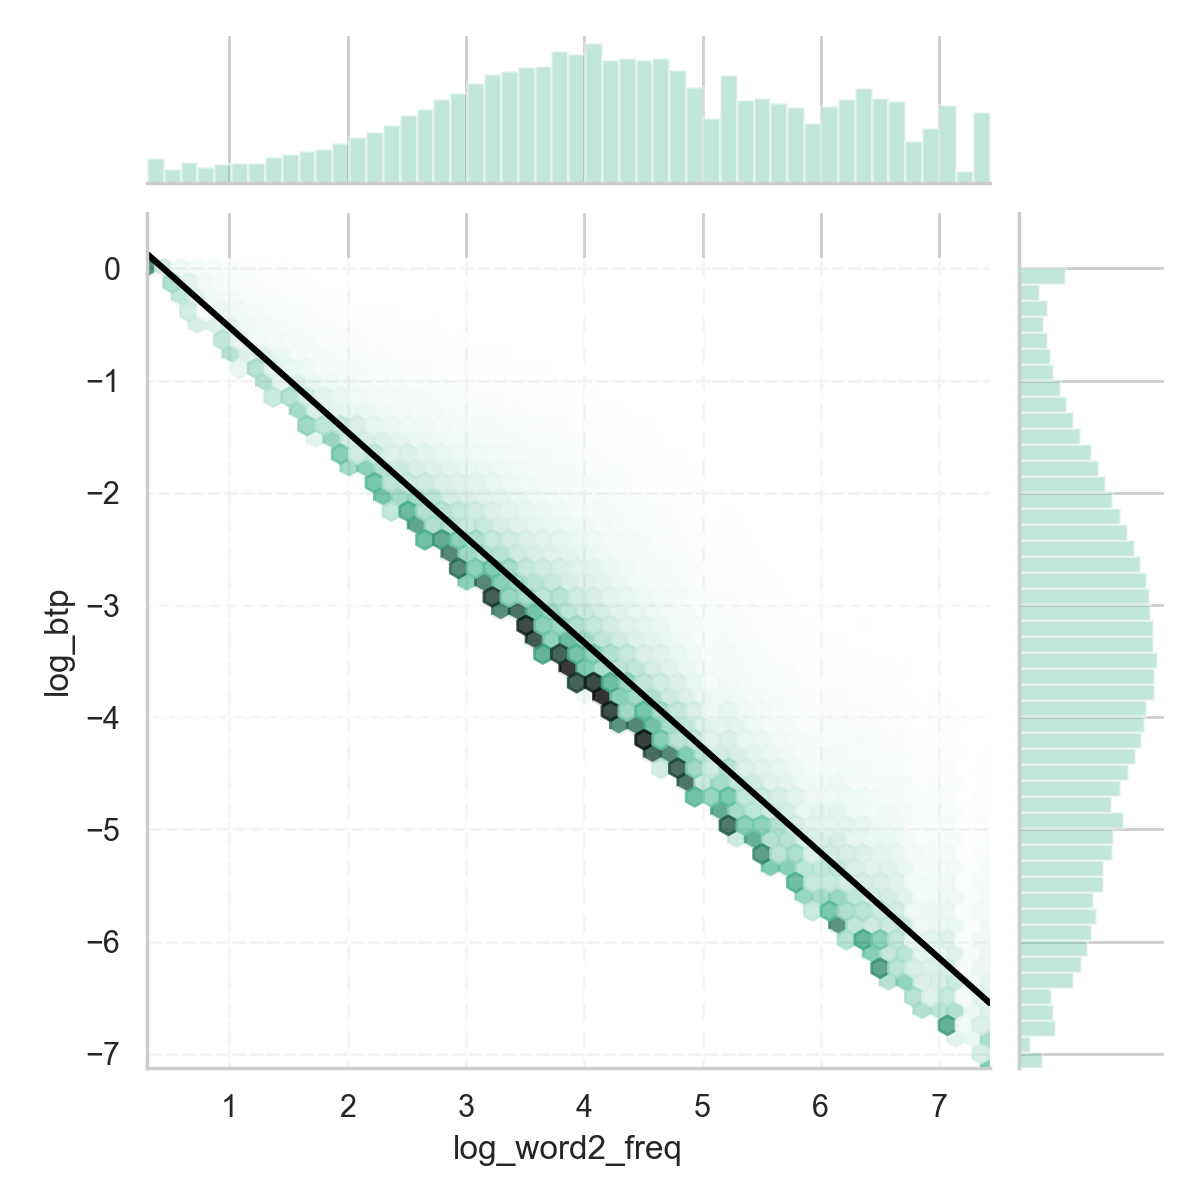

In [96]:
x = df_bi['log_word2_freq']
y = df_bi['log_btp']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

<IPython.core.display.Javascript object>


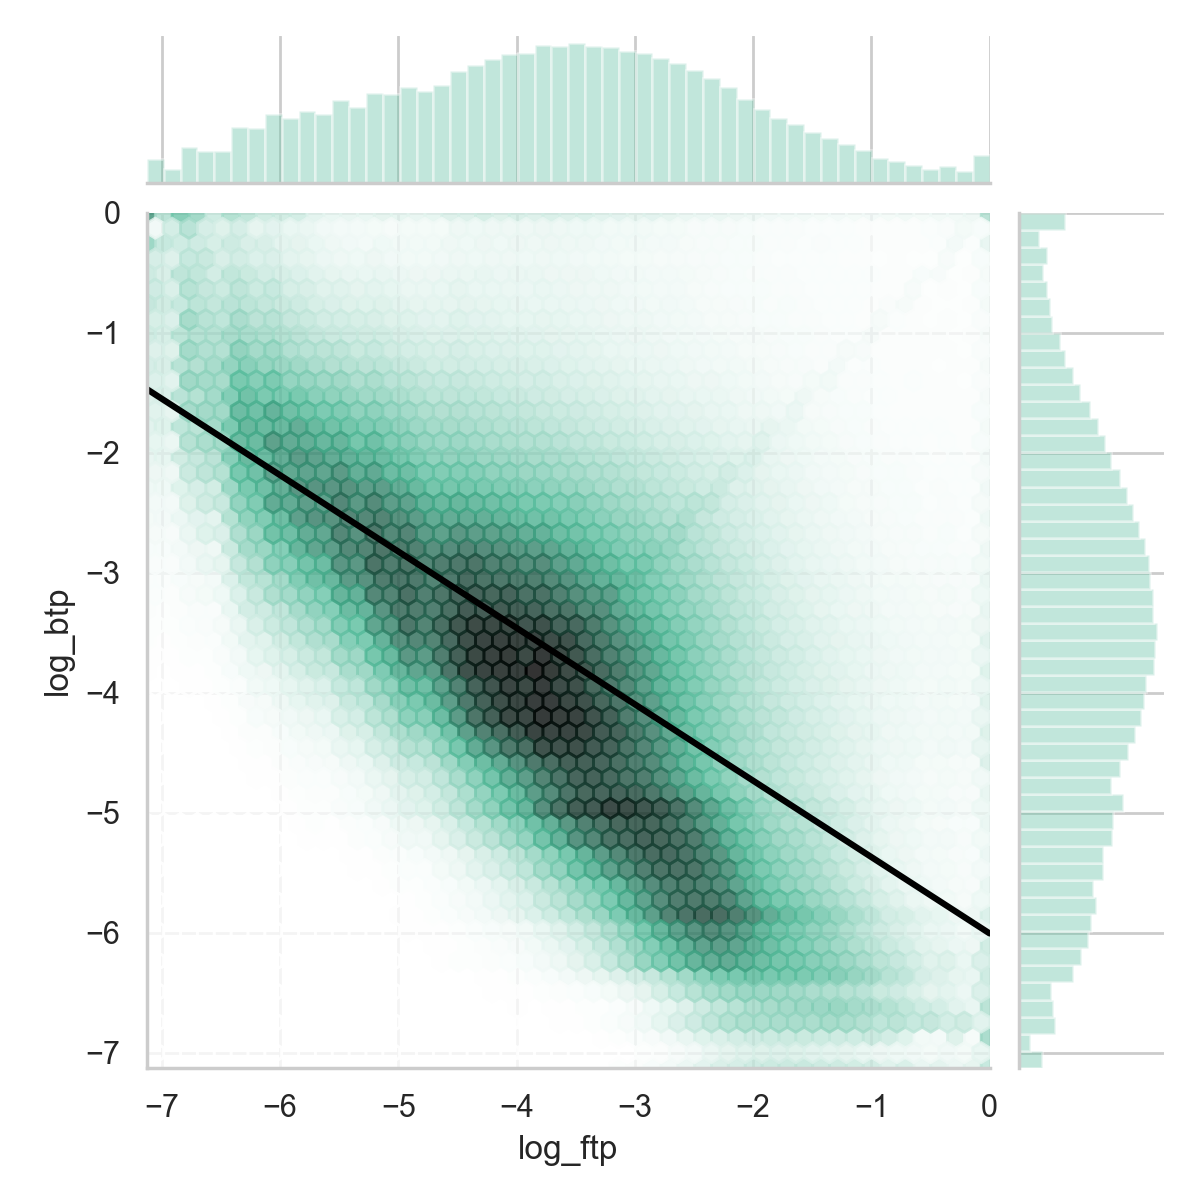

In [99]:
x = df_bi['log_ftp']
y = df_bi['log_btp']
g = sns.jointplot(x, y, kind='hex', alpha=.8)
sns.regplot(x, y, ax=g.ax_joint, scatter=False, ci=None, color='black');

In [3]:
# convert this Jupyter notebook
import subprocess as sp
make_md = 'jupyter nbconvert transitional_probabilities.ipynb --to html --output transitional_probabilities.html'.split(' ')
convert = sp.run(make_md)
if convert.returncode == 0:
    display_md('Jupyter notebook converted successfully.')
else:
    display_md('Error: encountered problem converting Jupyter notebook')

Jupyter notebook converted successfully.